# Arginine-glutamic acid dipeptide repeats (RERE)

The Arginine-glutamic acid dipeptide repeats (RERE) RERE gene encodes a nuclear receptor coregulator that positively regulates retinoic acid signaling [Fregeau et al., 2016](https://pubmed.ncbi.nlm.nih.gov/27087320/). A high percentage of RERE pathogenic variants affect a 21 amino acid (amino acids 1425–1445), histidine-rich region of the Atrophin-1 domain [Jordan et al., 2018](https://pubmed.ncbi.nlm.nih.gov/29330883/). The authors noted that Of the 19 individuals with NEDBEH described here and by Fregeau et al. (2016), nine (47%) carry sequence variants that affect a histidine-rich region of the Atrophin-1 domain that spans 21 amino acids (1425– 1445). The amino acid sequence in this region is 100% conserved down to Xenopus and zebrafish, but the functional significance of this domain is currently unknown.

Let us try to reproduce Table 3 of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5903952/
To do this, we will want to use (for instance)  Abnormal brain morphology HP:0012443 for "Brain anomalies", and use the MTC feature that tests only one term at a time (this will mean no Bonferroni is applied, just as in the original publication).  

Take a look at "analysis_config.specify_terms_strategy()"
Do this once for each of the items in Table 3 with the appropriate HPO term.
Presumably, we will also not achieve statistical significance, but if we get a comparable result as the authors, this will be fine.

As a stretch goal, we can figure out how to do "Number of defects per individual"


In [1]:
import genophenocorr
from genophenocorr.preprocessing import load_phenopacket_folder
from genophenocorr.preprocessing import configure_caching_cohort_creator
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {genophenocorr.__version__}")

Loaded HPO v2023-10-09
Using genophenocorr version 0.1.1dev


In [3]:
RERE_MANE_transcript = 'NM_012102.4'
RERE_protein_id = "NP_036234.3"
cohort_creator = configure_caching_cohort_creator(hpo, timeout=20)
phenopacket_input_folder = "../../../../GIT/phenopacket-store/notebooks/RERE/phenopackets/"
cohort = load_phenopacket_folder(pp_directory=phenopacket_input_folder, cohort_creator=cohort_creator)

Patients Created: 100%|██████████| 19/19 [01:15<00:00,  3.97s/it]
Validated under none policy
Showing errors and warnings
19 phenopacket(s) found at `../../../../GIT/phenopacket-store/notebooks/RERE/phenopackets/`
  patient #7
    variants
     warnings:
     ·Expected a VCF record, a VRS CNV, or an expression with `hgvs.c` but had an error retrieving any from patient Subject 1[PMID_29330883_Subject_1]. Remove variant from testing
     ·Patient PMID_29330883_Subject_1 has no variants to work with


In [4]:
from IPython.display import display, HTML
from genophenocorr.view import CohortViewable

cv = CohortViewable(hpo=hpo)
html = cv.process(cohort=cohort, transcript_id=RERE_MANE_transcript)

display(HTML(html))

HPO Term,ID,Annotation Count
Global developmental delay,HP:0001263,17
Intellectual disability,HP:0001249,17
Autistic behavior,HP:0000729,12
Hypotonia,HP:0001252,8
Thin corpus callosum,HP:0033725,7
Reduced cerebral white matter volume,HP:0034295,6
Short stature,HP:0004322,5
Ventricular septal defect,HP:0001629,5
Ventriculomegaly,HP:0002119,4
Strabismus,HP:0000486,4


In [5]:
from genophenocorr.preprocessing import UniprotProteinMetadataService
from genophenocorr.model.genome import GRCh38
from genophenocorr.preprocessing import VVTranscriptCoordinateService
from genophenocorr.view import ProteinVisualizable, ProteinVisualizer, ProteinViewable

pms = UniprotProteinMetadataService()
protein_meta = pms.annotate(RERE_protein_id)
txc_service = VVTranscriptCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(RERE_MANE_transcript)
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)

In [6]:
viewer = ProteinViewable()
html_prot = viewer.process(cohort, pvis)
display(HTML(html_prot))

Feature Name,Feature Type,Feature Coordinates,Variants in Feature
Disordered,region,1 - 90,1
BAH,domain,103 - 283,0
ELM2,domain,284 - 387,1
SANT,domain,391 - 443,0
Disordered,region,464 - 495,1
Disordered,region,542 - 1133,3
Disordered,region,1162 - 1246,0


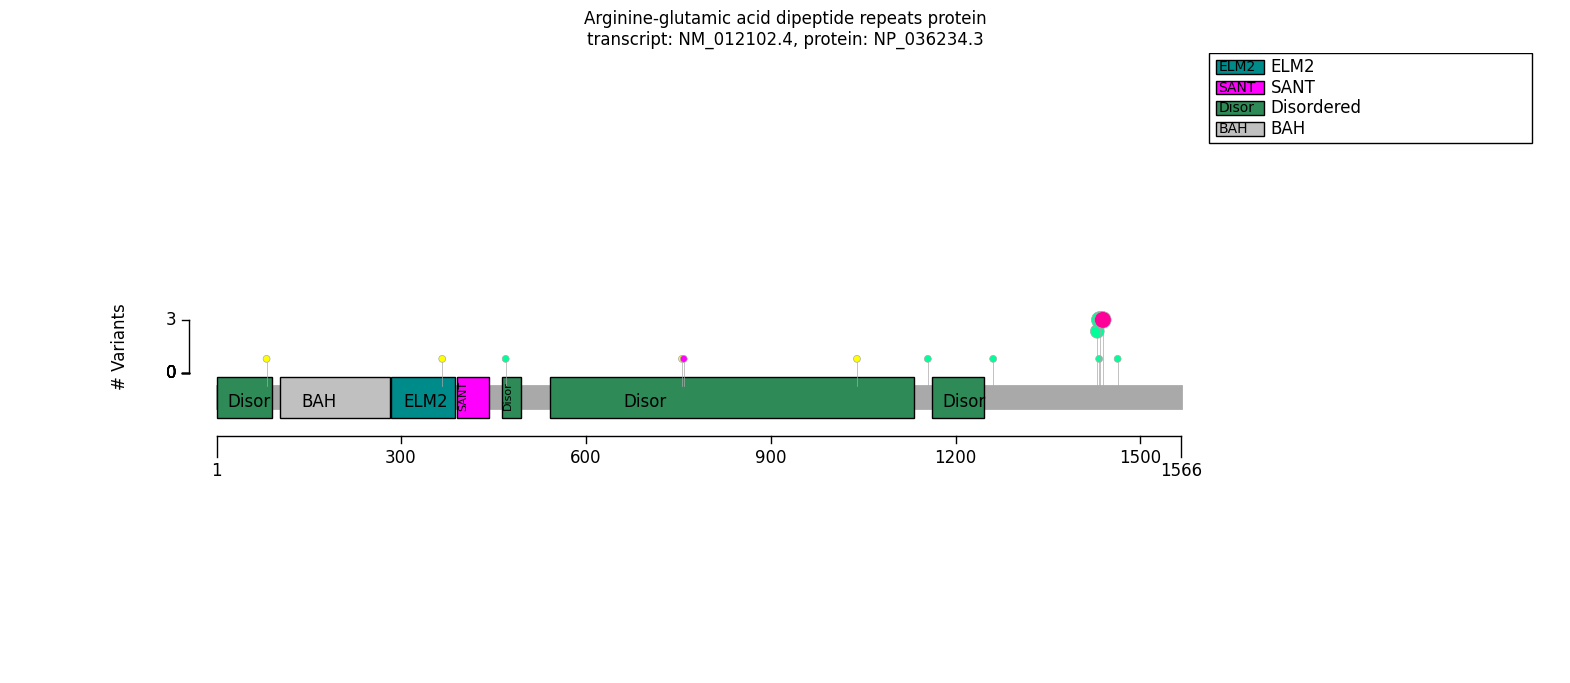

In [8]:
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis);

In [9]:
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from genophenocorr.analysis.predicate import PatientCategories
from genophenocorr.model.genome import Region

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = False

analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [10]:
from genophenocorr.model import VariantEffect

frameshift = analysis.compare_by_variant_effect(VariantEffect.FRAMESHIFT_VARIANT, tx_id=RERE_MANE_transcript)
frameshift.summarize(hpo, PatientCategories.YES)

FRAMESHIFT_VARIANT on NM_012102.4                   Yes            No          \
                                                  Count Percent Count Percent   
Thin corpus callosum [HP:0033725]                   0/2      0%   7/7    100%   
Reduced cerebral white matter volume [HP:0034295]   0/2      0%   6/6    100%   
Poor suck [HP:0002033]                              2/3     67%   0/7      0%   
Short stature [HP:0004322]                          0/3      0%   5/8     62%   
Hypertelorism [HP:0000316]                          2/4     50%  2/14     14%   
...                                                 ...     ...   ...     ...   
Abnormal myelination [HP:0012447]                   1/1    100%   1/1    100%   
Abnormality of globe location [HP:0100886]          2/2    100%   6/6    100%   
Redundant skin [HP:0001582]                         1/1    100%   1/1    100%   
Abnormality of eye movement [HP:0000496]            0/0      0%   4/4    100%   
Abnormality of the choanae [HP:0000415]             0/0      0%   3/3    100%   

FRAMESHIFT_VARIANT on NM_012102.4                                              
                                                    p value Corrected p value  
Thin corpus callosum [HP:0033725]                  0.027778               1.0  
Reduced cerebral white matter volume [HP:0034295]  0.035714               1.0  
Poor suck [HP:0002033]                             0.066667               1.0  
Short stature [HP:0004322]                         0.181818               1.0  
Hypertelorism [HP:0000316]                         0.197059               1.0  
...                                                     ...               ...  
Abnormal myelination [HP:0012447]                  1.000000               1.0  
Abnormality of globe location [HP:0100886]         1.000000               1.0  
Redundant skin [HP:0001582]                        1.000000               1.0  
Abnormality of eye movement [HP:0000496]           1.000000               1.0  
Abnormality of the choanae [HP:0000415]            1.000000               1.0  

[355 rows x 6 columns]

In [ ]:
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from genophenocorr.analysis.predicate import PatientCategories

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = False
analysis_config.heuristic_strategy()
analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

In [ ]:
frameshift = analysis.compare_by_variant_effect(VariantEffect.FRAMESHIFT_VARIANT, tx_id=RERE_MANE_transcript)
frameshift.summarize(hpo, PatientCategories.YES)

In [ ]:
missense = analysis.compare_by_variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=RERE_MANE_transcript)
missense.summarize(hpo, PatientCategories.YES)

In [ ]:
from genophenocorr.model import FeatureType

feature = analysis.compare_by_protein_feature_type(FeatureType.DOMAIN, tx_id=RERE_MANE_transcript)
feature.summarize(hpo, PatientCategories.YES)